<a href="https://colab.research.google.com/github/AftabQuant/Deep-Learning/blob/main/Social_Media_Engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('price of a Football player.csv')

In [3]:
df.head(2)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0


In [4]:
df.drop(df.columns[[0, 8, 14]], axis=1, inplace=True)

In [5]:
df.head(2)

,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_points,region,nationality,new_foreign,age_cat,big_club,new_signing
0,Arsenal,28,LW,1,65.0,4329,12.0,264,3.0,Chile,0,4,1,0
1,Arsenal,28,AM,1,50.0,4395,9.5,167,2.0,Germany,0,4,1,0


In [6]:
df.isnull().sum().sum()

np.int64(1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   club          461 non-null    object 
 1   age           461 non-null    int64  
 2   position      461 non-null    object 
 3   position_cat  461 non-null    int64  
 4   market_value  461 non-null    float64
 5   page_views    461 non-null    int64  
 6   fpl_value     461 non-null    float64
 7   fpl_points    461 non-null    int64  
 8   region        460 non-null    float64
 9   nationality   461 non-null    object 
 10  new_foreign   461 non-null    int64  
 11  age_cat       461 non-null    int64  
 12  big_club      461 non-null    int64  
 13  new_signing   461 non-null    int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 50.6+ KB


In [8]:
counts = df['nationality'].value_counts()
threshold = 1
repl = counts[counts <= threshold].index
df['nationality'] = df['nationality'].replace(repl, "other")

In [9]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [10]:
from sklearn.compose import ColumnTransformer

In [11]:
ct = ColumnTransformer(transformers=[
    ('tnf1', SimpleImputer(), [8]),
    ('tnf2', OneHotEncoder(drop='first', sparse_output=False), [0, 9]),
    ('tnf3', OrdinalEncoder(), [2])
], remainder='passthrough')

In [12]:
x = df.iloc[:, :-1]
y = df['new_signing']

In [13]:
x_scaled = ct.fit_transform(x)

In [14]:
x_scaled.shape

(461, 71)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scaled = ss.fit_transform(x_scaled)

In [17]:
x_scaled.shape

(461, 71)

In [18]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import  Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [19]:
ann = Sequential()

In [20]:
ann.add(Dense(60, activation='relu', input_shape = (71, ), kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
ann.add(BatchNormalization())
ann.add(Dense(50, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
ann.add(BatchNormalization())
ann.add(Dense(40, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
ann.add(BatchNormalization())
ann.add(Dense(30, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
ann.add(BatchNormalization())
ann.add(Dense(20, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
ann.add(BatchNormalization())
ann.add(Dense(10, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
ann.add(BatchNormalization())
ann.add(Dense(5, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
ann.add(BatchNormalization())
ann.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
ann.add(BatchNormalization())

In [21]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 60)             │         4,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 60)             │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         3,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1)              │             4 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,395 (48.42 KB)

 Trainable params: 11,963 (46.73 KB)

 Non-trainable params: 432 (1.69 KB)

In [22]:
initial_weights = ann.get_weights()

In [23]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
ann.fit(x_train, y_train, epochs=300, batch_size = 128, validation_split=0.2, callbacks=[EarlyStopping(patience=30)])

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 316ms/step - accuracy: 0.6318 - loss: 4.9756 - val_accuracy: 0.8108 - val_loss: 1.0491
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6790 - loss: 4.1703 - val_accuracy: 0.8243 - val_loss: 1.0266
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6971 - loss: 4.0485 - val_accuracy: 0.8108 - val_loss: 1.0065
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6812 - loss: 4.1899 - val_accuracy: 0.8108 - val_loss: 0.9974
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7109 - loss: 3.9998 - val_accuracy: 0.7973 - val_loss: 0.9915
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6663 - loss: 4.1476 - val_accuracy: 0.8108 - val_loss: 0.9781
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7258 - loss: 3.7692 - val_accuracy: 0.7973 - val_loss: 0.9518
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6953 - loss: 3.7717 - val_accuracy: 0.8243 - val_los

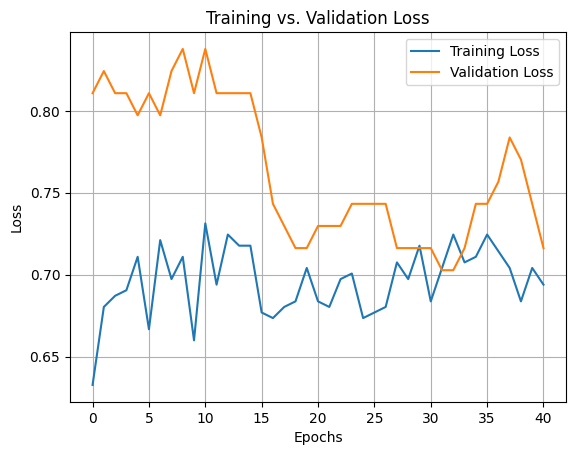

In [25]:
plt.plot(ann.history.history['accuracy'], label='Training Loss')
plt.plot(ann.history.history['val_accuracy'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
updated_weights = ann.get_weights()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_pred = ann.predict(x_test)
y_pred = y_pred > 0.5
accuracy_score(y_test, y_pred)*100

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step


83.87096774193549

In [29]:
y_train_pred = ann.predict(x_train)
y_train_pred = y_train_pred > 0.5
accuracy_score(y_train, y_train_pred)*100

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


76.3586956521739